a. Obtener una visualización de las comunidades presentes en dicha red (indicando el algoritmo utilizado). 
  
b. Considerando lo que respondiste en el parcialito 1 (ejercicio 2):      
 * Si mencionaste que había homofilia, ¿corresponde por el mismo tipo que mencionaste anteriormente? ¿por qué?    
 * Si mencionaste que no había homofilia (o bien no realizaste el ejercicio), ¿qué tipo de homofilia se puede ver presente?

c. Obtener los nodos correspondientes a una de las subredes (con al menos 20% de los nodos), y realizar una visualización de las sub-comunidades presentes.

In [30]:
import networkx as nx
import pandas as pd

In [31]:
net = pd.read_csv('../data/World.csv')

In [32]:
G = nx.from_pandas_edgelist(net,'Origen','Destino')

In [33]:
# este primer import es porque ocurría un conflico con un otro modulo ya que al 
# hacer sudo pip3 install python-louvain se importaba como
# community (un modulo pre-existente)
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [34]:
def communities_plot(G,partition,big = False):
    if big:
        plt.figure(figsize=(30,30))
        fontsize = 30
    else:
        plt.figure(figsize=(20,20))
        fontsize = 20


        
    plt.axis('off')
    plt.title("Comunidades utilizando el algoritmo de Louvain",fontdict={'fontsize':fontsize})
    pos = nx.spring_layout(G)

    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=700,
                        cmap=cmap, node_color=list(partition.values()),alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos,font_size=20)
    
    plt.show()

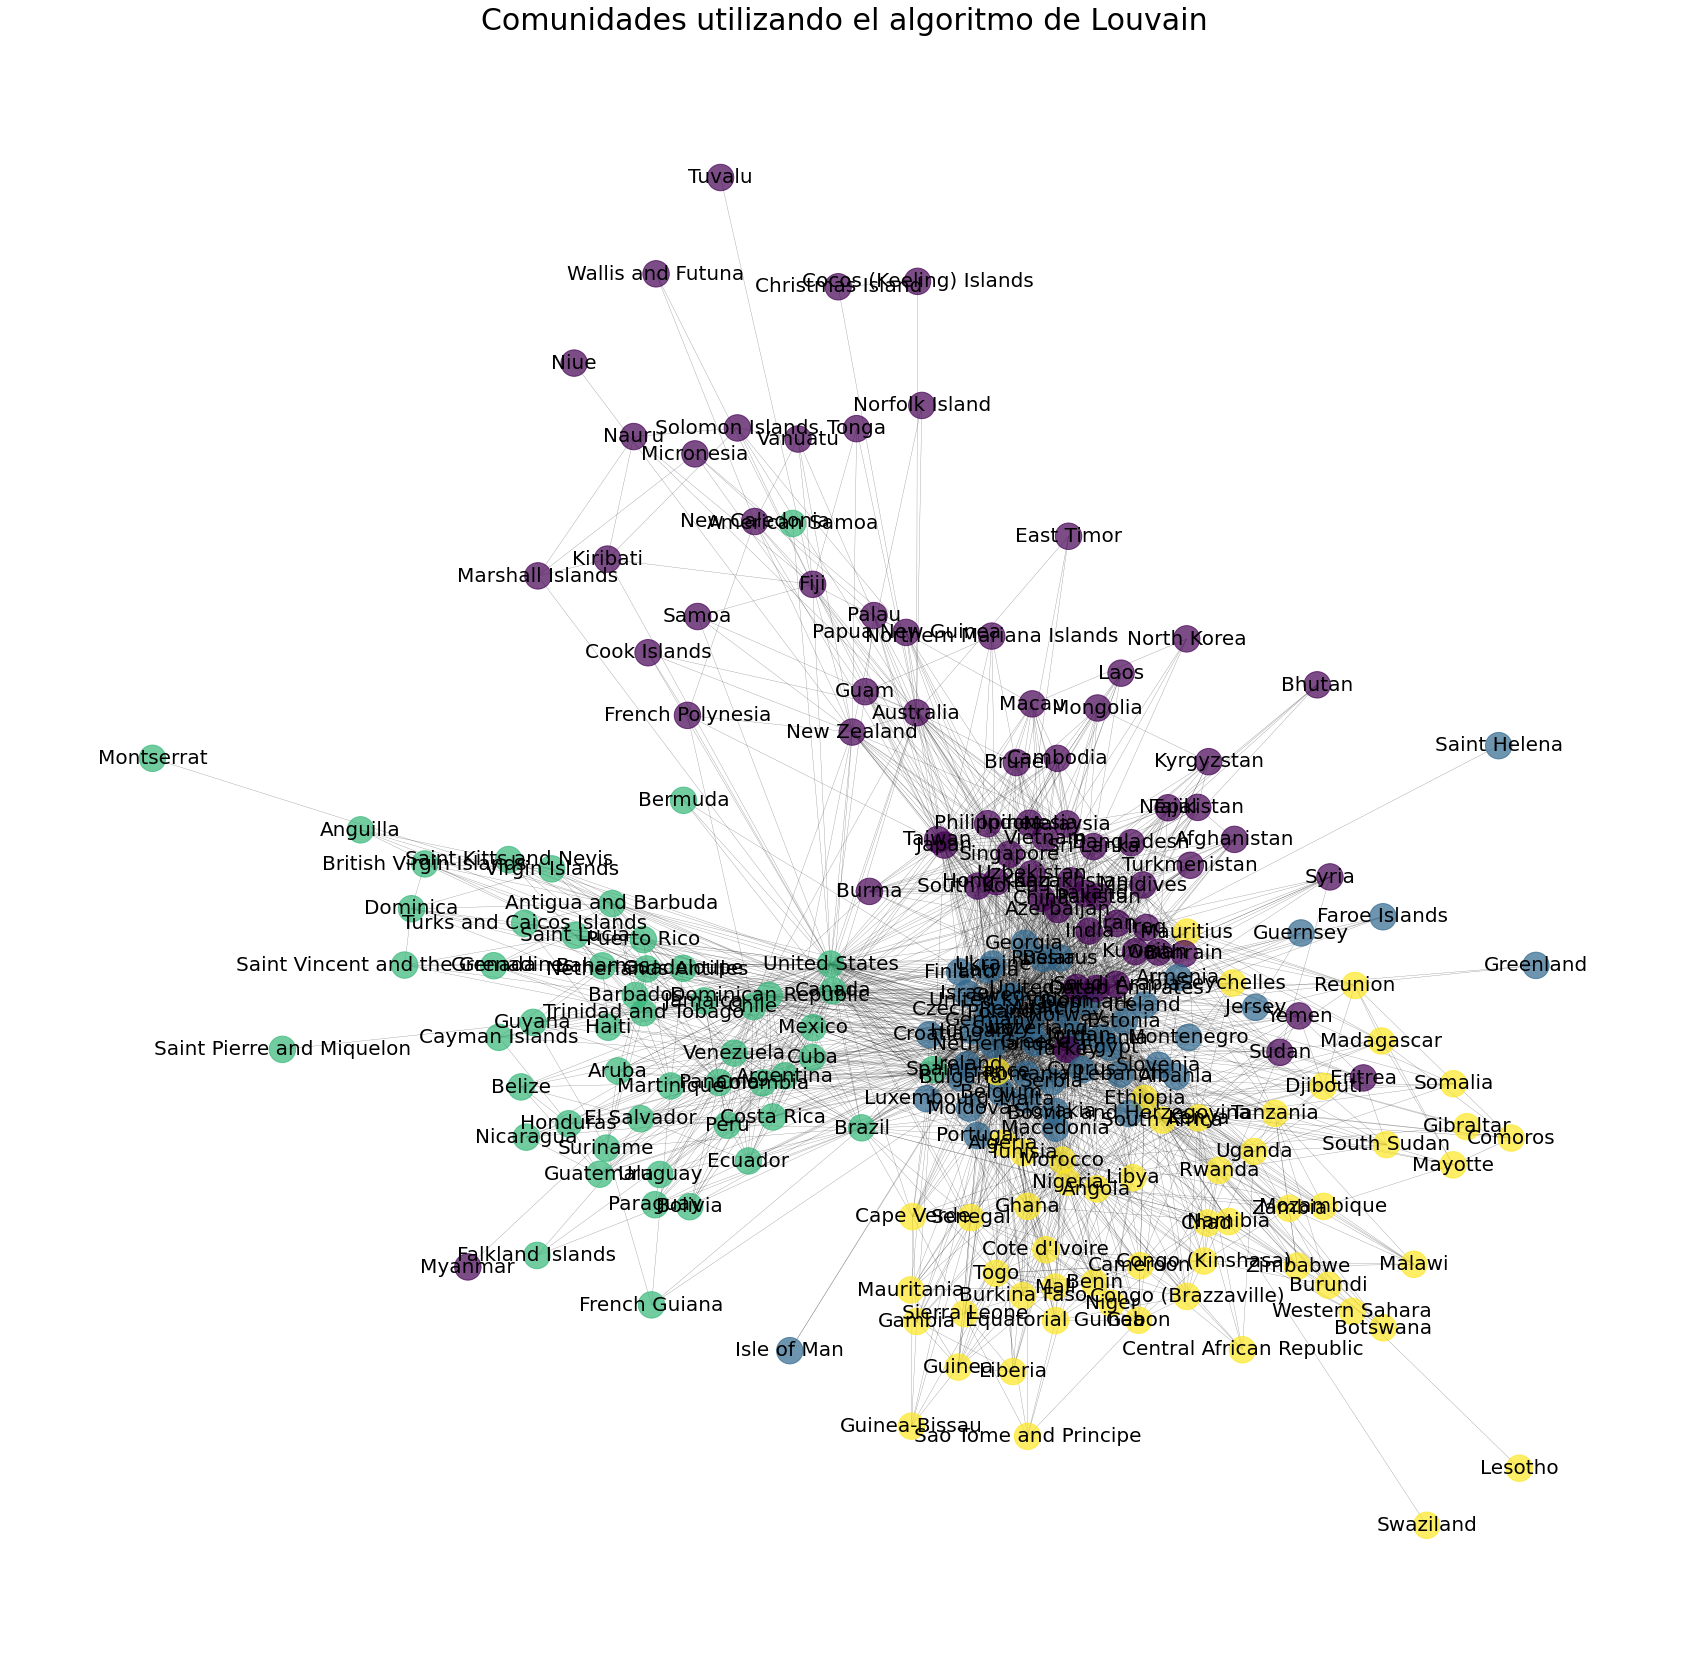

In [35]:
partition = community_louvain.best_partition(G)
communities_plot(G,partition,big = True)

Es el mimsmo tipo de homofilia que se mencionó en el parcialito 1. En el parcialito anterior lo había graficado con gephi, sin cononcimientos de los algoritmos para detección de comunidades. Ahora, utilizando el algoritmo de Louvain, podemos observar que hay comunidades por continente o proximidad geográfica. En amarillo se observan países Africanos, en azul países Europeos, en verde países de America y en violeta países de Oceanía y Asia. 

In [36]:
from collections import defaultdict

In [37]:
# diccionario que va a tener como clave el numero de la comunidad 
# y como valor una lista con los miembros de esa comunidad
communities = defaultdict(list)
for n in partition:
    communities[partition[n]].append(n)

In [38]:
# averiguo cual es la comunidad con mas nodos
max_len = 0
for community in communities:
    if len(communities[community]) > max_len:
        max_len = len(communities[community])
        largest_community = community

In [39]:
# creo un subgrafo a partir de la comunidad más grande
sub_G = G.subgraph(communities[largest_community])

In [40]:
df_sub_g = nx.to_pandas_edgelist(sub_G)
df_sub_g.columns = ["Origen","Destino"]
df_sub_g.to_csv("../data/subgraph.csv",index=False)

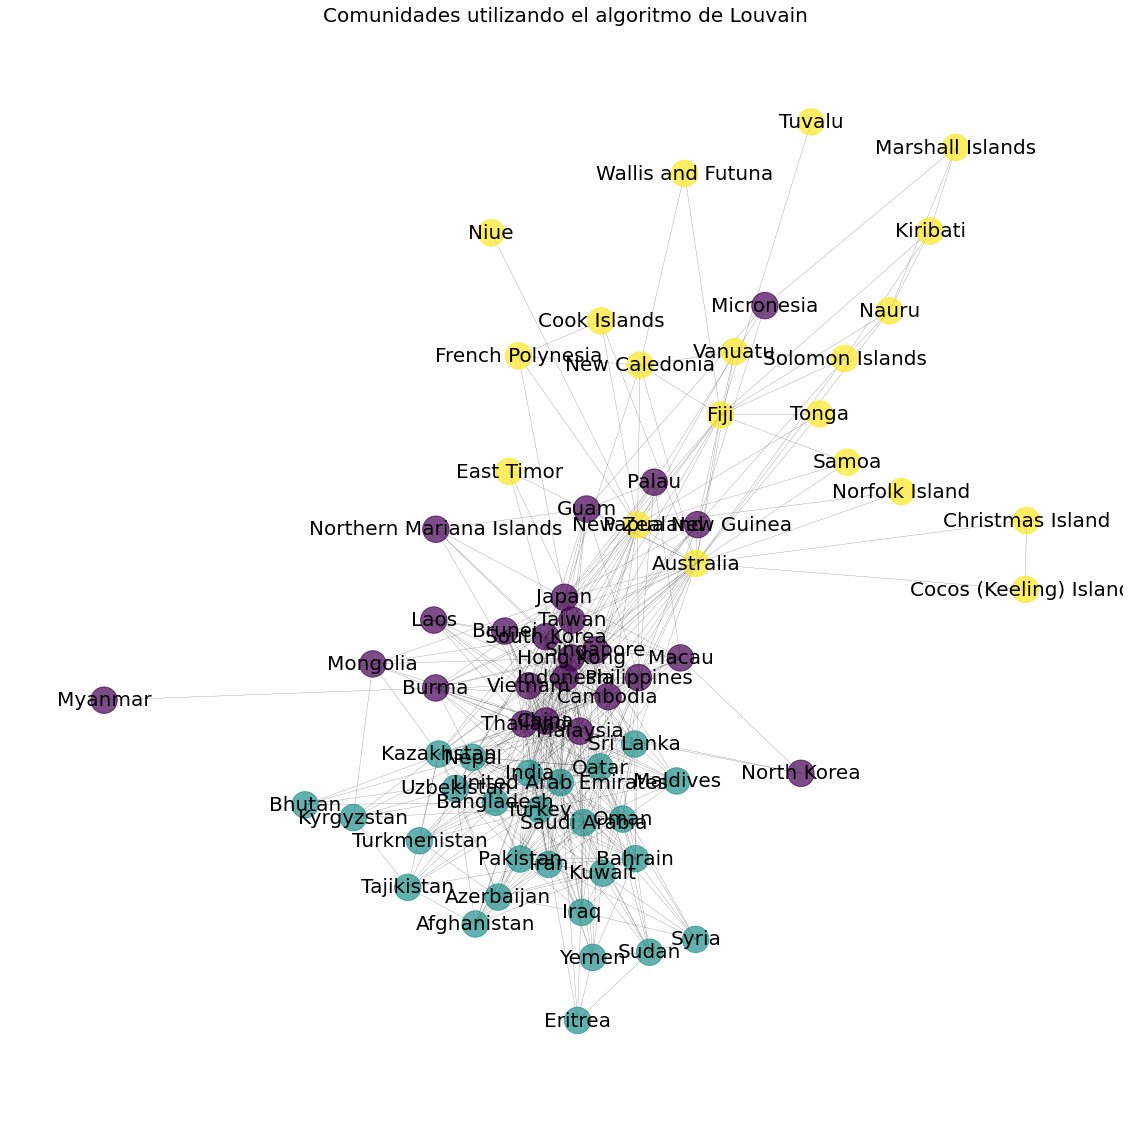

In [41]:
partition = community_louvain.best_partition(sub_G)

communities_plot(sub_G,partition)

Observamos que siguen habiendo communidades por ubicación geografica. La comunidad más grande que había era la de Asia-Oceanía, con este nuevo subgrafo observamos comunidades también por ubicación gegrafica. Principalmente entre Oceanía y Asia, y luego dentro de Asia entre las diferentes regiones del continente. 

A grandes rasgos: 

* Asia Central (violeta)
* Asia Occidental y Asia del Sur (azul)
* Sudeste asiático (con mezclas de el este de Melanesia y Micronesia) (verde)
* Australasia y Polinesia (Amarillo)